In [1]:
import pandas as pd
df = pd.read_csv('Product_use_case.csv')


In [2]:
df

,Month,Merchant,Click on ad,Click on 'Register',Complete registration,Views on site
0,June,Pokerfans,N,N,N,"136,586"
1,March,Betunfair,Y,Y,N,"2,000"
2,July,Betunfair,Y,N,N,"26,606"
3,April,AliDress,Y,Y,N,"41,821"
4,June,Bet180,Y,N,N,"38,962"
5,April,AliDress,Y,Y,Y,"27,923"
6,March,Pokerfans,Y,Y,Y,"30,604"
7,August,Betunfair,Y,Y,Y,"31,633"
8,August,Betunfair,N,N,N,"30,664"
9,March,Bet180,Y,Y,Y,"51,775"


In [3]:
df.Merchant.unique()

array(['Pokerfans', 'Betunfair', 'AliDress', 'Bet180', 'Scream'],
      dtype=object)

In [4]:
df.columns

Index(['Month', 'Merchant', 'Click on ad', 'Click on 'Register'',
       'Complete registration', ' Views on site '],
      dtype='object')

In [5]:
df.Month.unique()

array(['June', 'March', 'July', 'April', 'August', 'May'], dtype=object)

##### Data Cleaning 

In [6]:
df[' Views on site '] = df[' Views on site '].astype(str)

In [7]:
df[' Views on site '] = df[' Views on site '].str.replace(' ', '')

In [8]:
df[' Views on site '] = df[' Views on site '].str.replace(',', '')

In [9]:
df[' Views on site '] = df[' Views on site '].astype(int)

In [10]:
df['Month'] = df['Month'].str.replace('April', 'April, 2019')
df['Month'] = df['Month'].str.replace('March', 'March, 2019')
df['Month'] = df['Month'].str.replace('May', 'May, 2019')
df['Month'] = df['Month'].str.replace('June', 'June, 2019')
df['Month'] = df['Month'].str.replace('July', 'July, 2019')
df['Month'] = df['Month'].str.replace('August', 'August, 2019')


In [11]:
df['Month'] = df['Month'].astype(str)
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df['Month'] = df['Month'].astype(str)
df['Month'] = df['Month'].str[:7]


In [13]:
df.loc[df['Month']=='2019-08', [' Views on site ']] *= (31/14)

In [14]:
df[' Views on site '] = df.apply(lambda row: row[' Views on site ']*(31/5) if row['Merchant'] == 'Betunfair' and row['Month'] == '2019-03' 
     else row[[' Views on site ']], axis=1)

In [114]:
new_df = df

new_df[' Views on site '] = new_df.apply(lambda row: row[' Views on site ']+16664 
                                         if row['Merchant'] == 'Betunfair' 
                                            and row['Month'] == '2019-06' 
                                            and row["Click on 'Register'"] == 'Y'
                                            and row['Complete registration'] == 'N'
                                         else row[[' Views on site ']], axis=1)

new_df[' Views on site '] = new_df.apply(lambda row: row[' Views on site ']+48296 
                                         if row['Merchant'] == 'Betunfair' 
                                             and row['Month'] == '2019-06' 
                                             and row["Click on 'Register'"] == 'Y'
                                             and row['Complete registration'] == 'Y'
                                         else row[[' Views on site ']], axis=1)

new_df[' Views on site '] = new_df.apply(lambda row: row[' Views on site ']-64961 
                                         if row['Merchant'] == 'Betunfair' 
                                             and row['Month'] == '2019-06' 
                                             and row["Click on 'Register'"] == 'N'
                                             and row['Click on ad'] == 'Y'
                                         else row[[' Views on site ']], axis=1)

df=new_df


##### 1. What is the sign-up rate (registrations over total views on site) by month and which months were below the period average?

In [201]:
df_month_sum = df.groupby(['Month']).agg(sum).reset_index()

In [202]:
df_month_sum.rename(columns={' Views on site ':'Views on site total'}, 
                 inplace=True)
df_month_sum

,Month,Views on site total
0,2019-03,1.047466e+06
1,2019-04,1.504933e+06
2,2019-05,1.832093e+06
3,2019-06,1.112341e+06
4,2019-07,1.046910e+06
5,2019-08,1.014205e+06


Text(0.5, 1.0, 'Total Views on site')

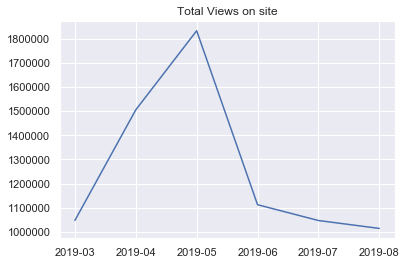

In [203]:
x = df_month_sum['Month']
y = df_month_sum['Views on site total']
plt.plot(x, y)
plt.title('Total Views on site')




#### This graph is showing seasonality!

In [118]:
df_registered = df[df['Complete registration'] == 'Y']

In [119]:
df_registered = df_registered.reset_index()

In [120]:
df_registered = df_registered.drop(columns = ['index'])

In [121]:
df_registered.dtypes

Month                     object
Merchant                  object
Click on ad               object
Click on 'Register'       object
Complete registration     object
 Views on site           float64
dtype: object

In [122]:
df_registered.columns

Index(['Month', 'Merchant', 'Click on ad', 'Click on 'Register'',
       'Complete registration', ' Views on site '],
      dtype='object')

In [123]:
df_registered_month_sum = df_registered.groupby(['Month']).agg(sum).reset_index()

In [124]:
df_registered_month_sum.rename(columns={' Views on site ':'Views on site registered'}, 
                 inplace=True)
df_registered_month_sum

,Month,Views on site registered
0,2019-03,184307.400000
1,2019-04,384863.000000
2,2019-05,478190.000000
3,2019-06,194008.000000
4,2019-07,214247.000000
5,2019-08,206701.357143


In [125]:
df_ratio = pd.merge(df_registered_month_sum,
                 df_month_sum,
                 on='Month', 
                 how='left')
df_ratio

,Month,Views on site registered,Views on site total
0,2019-03,184307.400000,1.047466e+06
1,2019-04,384863.000000,1.504933e+06
2,2019-05,478190.000000,1.832093e+06
3,2019-06,194008.000000,1.112341e+06
4,2019-07,214247.000000,1.046910e+06
5,2019-08,206701.357143,1.014205e+06


In [126]:
df_ratio['ratio'] = df_ratio.apply(lambda x: x['Views on site registered']/x['Views on site total'], axis=1)

In [127]:
#df_ratio['ratio'] = df_ratio['Views on site registered'] / df_ratio['Views on site total']

In [128]:
df_ratio

,Month,Views on site registered,Views on site total,ratio
0,2019-03,184307.400000,1.047466e+06,0.175956
1,2019-04,384863.000000,1.504933e+06,0.255734
2,2019-05,478190.000000,1.832093e+06,0.261007
3,2019-06,194008.000000,1.112341e+06,0.174414
4,2019-07,214247.000000,1.046910e+06,0.204647
5,2019-08,206701.357143,1.014205e+06,0.203806


In [129]:
df_ratio['ratio average'] = 1455600/6870352

In [131]:
df_ratio['below average'] = df_ratio['ratio'] < df_ratio['ratio average']

In [132]:
df_ratio[df_ratio['below average'] == True]

,Month,Views on site registered,Views on site total,ratio,ratio average,below average
0,2019-03,184307.400000,1.047466e+06,0.175956,0.211867,True
3,2019-06,194008.000000,1.112341e+06,0.174414,0.211867,True
4,2019-07,214247.000000,1.046910e+06,0.204647,0.211867,True
5,2019-08,206701.357143,1.014205e+06,0.203806,0.211867,True


In [133]:
df_ratio

,Month,Views on site registered,Views on site total,ratio,ratio average,below average
0,2019-03,184307.400000,1.047466e+06,0.175956,0.211867,True
1,2019-04,384863.000000,1.504933e+06,0.255734,0.211867,False
2,2019-05,478190.000000,1.832093e+06,0.261007,0.211867,False
3,2019-06,194008.000000,1.112341e+06,0.174414,0.211867,True
4,2019-07,214247.000000,1.046910e+06,0.204647,0.211867,True
5,2019-08,206701.357143,1.014205e+06,0.203806,0.211867,True


###### 2. What drives the decrease in those months and what does the observed trend show?


In [134]:
df_ad = df[df["Click on ad"] == 'Y']

In [135]:
df_ad = df_ad.sort_values('Month')

In [136]:
df_click_reg = df_ad[df_ad["Click on 'Register'"] == 'Y']

In [137]:
df_complete = df_click_reg[df_click_reg["Complete registration"] == 'Y']

ratio clicked ad

In [138]:
df_month_merch_ = df.groupby(['Month', 'Merchant']).agg(sum).reset_index()
df_ratio_ad = df_ad.drop(columns = ['Click on ad', "Click on 'Register'", 
                             'Complete registration'])
df_ratio_ad = df_ad.groupby(['Month', 'Merchant']).agg(sum).reset_index()
df_ratio_ad.rename(columns={' Views on site ':'Views on site clicked on ad'}, inplace = True) 


In [139]:
df_ratio_ad = pd.merge(df_ratio_ad,
                 df_month_merch_ ,
                 on=['Month', 'Merchant'],  
                 how='left')
df_ratio_ad['ratio'] = df_ratio_ad.apply(lambda x: x['Views on site clicked on ad']/x[' Views on site '], axis=1)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


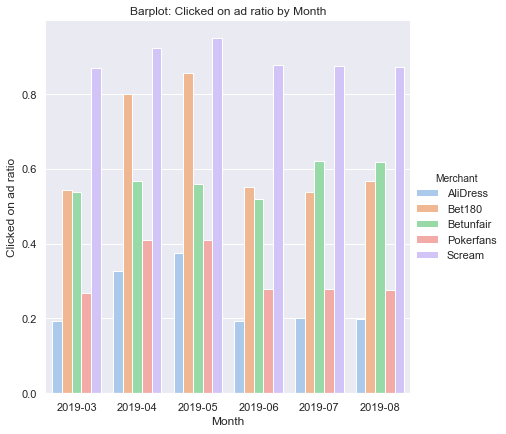

In [140]:
import seaborn as sns
df__3 = df_ratio_ad.drop(columns = ['Views on site clicked on ad', ' Views on site '])
sns.set(style="darkgrid")

g = sns.factorplot(x="Month", y="ratio", hue = 'Merchant', data= df__3,
                   size=6, kind="bar", palette="pastel", ci=None)
g.despine(left=True)
g.set_ylabels("Clicked on ad ratio")
g.set_xlabels("Month")
plt.title('Barplot: Clicked on ad ratio by Month')
plt.show()

ratio clicked reg

In [141]:
df_month_merch_ad = df_ad.groupby(['Month', 'Merchant']).agg(sum).reset_index()

In [142]:
df_ratio_click_reg = df_click_reg.drop(columns = ['Click on ad', "Click on 'Register'", 
                             'Complete registration'])

In [143]:
df_ratio_click_reg = df_ratio_click_reg.groupby(['Month', 'Merchant']).agg(sum).reset_index()

In [144]:
df_ratio_click_reg.rename(columns={' Views on site ':'Views on site clicked on reg'}, inplace = True) 


In [145]:
df_ratio_click_reg = pd.merge(df_ratio_click_reg,
                 df_month_merch_ad ,
                 on=['Month', 'Merchant'],  
                 how='left')


In [146]:
df_ratio_click_reg['ratio'] = df_ratio_click_reg.apply(lambda x: x['Views on site clicked on reg']/x[' Views on site '], axis=1)

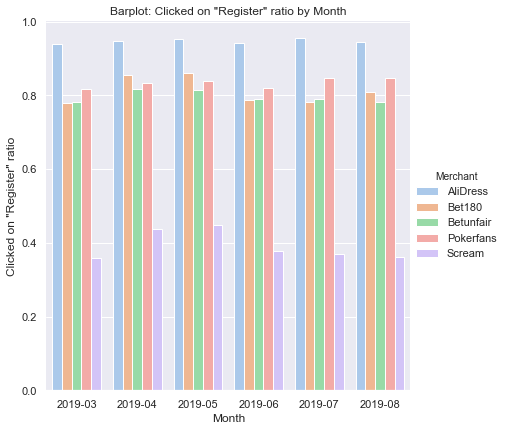

In [147]:
df__ = df_ratio_click_reg.drop(columns = ['Views on site clicked on reg', ' Views on site '])
sns.set(style="darkgrid")

g = sns.factorplot(x="Month", y="ratio", hue = 'Merchant', data= df__,
                   size=6, kind="bar", palette="pastel", ci=None)
g.despine(left=True)
g.set_ylabels('Clicked on "Register" ratio')
g.set_xlabels("Month")
plt.title('Barplot: Clicked on "Register" ratio by Month')
plt.show()

ratio completed reg

In [148]:
df_month_merch_clicked = df_click_reg.groupby(['Month', 'Merchant']).agg(sum).reset_index()
df_ratio_compl = df_complete.drop(columns = ['Click on ad', "Click on 'Register'", 
                             'Complete registration'])
df_ratio_compl = df_complete.groupby(['Month', 'Merchant']).agg(sum).reset_index()
df_ratio_compl.rename(columns={' Views on site ':'Views on site complete reg'}, inplace = True) 


In [149]:
df_ratio_compl = pd.merge(df_ratio_compl,
                 df_month_merch_clicked ,
                 on=['Month', 'Merchant'],  
                 how='left')
df_ratio_compl['ratio'] = df_ratio_compl.apply(lambda x: x['Views on site complete reg']/x[' Views on site '], axis=1)

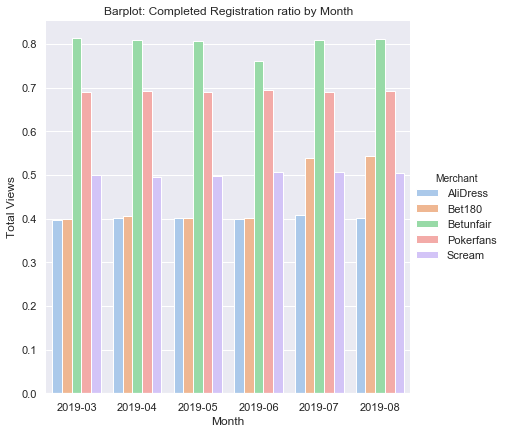

In [150]:
df__2 = df_ratio_compl.drop(columns = ['Views on site complete reg', ' Views on site '])
sns.set(style="darkgrid")

g = sns.factorplot(x="Month", y="ratio", hue = 'Merchant', data= df__2,
                   size=6, kind="bar", palette="pastel", ci=None)
g.despine(left=True)
g.set_ylabels("Total Views")
g.set_xlabels("Month")
plt.title('Barplot: Completed Registration ratio by Month')
plt.show()

In [151]:
df_ratio_compl_gr = df_ratio_compl.groupby(['Month']).mean()

In [152]:
df_ratio_compl_gr

,Views on site complete reg,Views on site,ratio
Month,,,
2019-03,36861.480000,68246.680000,0.560240
2019-04,76972.600000,141295.800000,0.560746
2019-05,95638.000000,177656.200000,0.559018
2019-06,38801.600000,72543.400000,0.552468
2019-07,42849.400000,70256.600000,0.590782
2019-08,41340.271429,68648.614286,0.590348


sign up ratio (registered by total views)

In [153]:
df_month_merch_ = df.groupby(['Month', 'Merchant']).agg(sum).reset_index()
df_ratio_signup = df_registered.drop(columns = ['Click on ad', "Click on 'Register'", 
                             'Complete registration'])
df_ratio_signup = df_ratio_signup.groupby(['Month', 'Merchant']).agg(sum).reset_index()
df_ratio_signup.rename(columns={' Views on site ':'Views on site complete reg'}, inplace = True) 


In [154]:
df_ratio_signup = pd.merge(df_ratio_signup,
                 df_month_merch_ ,
                 on=['Month', 'Merchant'],  
                 how='left')
df_ratio_signup['ratio'] = df_ratio_signup.apply(lambda x: x['Views on site complete reg']/x[' Views on site '], axis=1)

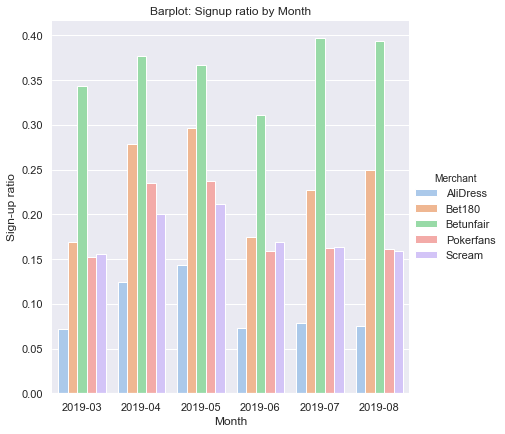

In [155]:
df__4 = df_ratio_signup.drop(columns = ['Views on site complete reg', ' Views on site '])
sns.set(style="darkgrid")

g = sns.factorplot(x="Month", y="ratio", hue = 'Merchant', data= df__4,
                   size=6, kind="bar", palette="pastel", ci=None)
g.despine(left=True)
g.set_ylabels("Sign-up ratio")
g.set_xlabels("Month")
plt.title('Barplot: Signup ratio by Month')
plt.show()

In [156]:
#pd.options.display.float_format = '{:,.0f}'.format
#df_ratio

## Interpreting the analysis

In [175]:
df_ratio_ad[df_ratio_ad['Merchant'] == 'Betunfair']

,Month,Merchant,Views on site clicked on ad,Views on site,ratio
2,2019-03,Betunfair,84419.2,156692.600000,0.538757
7,2019-04,Betunfair,188727.0,331826.000000,0.568753
12,2019-05,Betunfair,230256.0,412302.000000,0.558464
17,2019-06,Betunfair,111699.0,215323.000000,0.518751
22,2019-07,Betunfair,126302.0,203229.000000,0.621476
27,2019-08,Betunfair,110298.0,178196.857143,0.618967


In [176]:
df_ratio_click_reg[df_ratio_click_reg['Merchant'] == 'Betunfair']

,Month,Merchant,Views on site clicked on reg,Views on site,ratio
2,2019-03,Betunfair,66135.4,84419.2,0.783417
7,2019-04,Betunfair,154461.0,188727.0,0.818436
12,2019-05,Betunfair,187277.0,230256.0,0.813343
17,2019-06,Betunfair,88242.0,111699.0,0.789998
22,2019-07,Betunfair,99696.0,126302.0,0.789346
27,2019-08,Betunfair,86412.5,110298.0,0.783446


In [177]:
df_ratio_compl[df_ratio_compl['Merchant'] == 'Betunfair']

,Month,Merchant,Views on site complete reg,Views on site,ratio
2,2019-03,Betunfair,53735.4,66135.4,0.812506
7,2019-04,Betunfair,125127.0,154461.0,0.810088
12,2019-05,Betunfair,151066.0,187277.0,0.806645
17,2019-06,Betunfair,67064.0,88242.0,0.760001
22,2019-07,Betunfair,80565.0,99696.0,0.808107
27,2019-08,Betunfair,70044.5,86412.5,0.810583


Scream

In [191]:
df_ratio_ad[df_ratio_ad['Merchant'] == 'Scream']

,Month,Merchant,Views on site clicked on ad,Views on site,ratio
4,2019-03,Scream,213537.000000,245797.000000,0.868753
9,2019-04,Scream,243293.000000,263142.000000,0.924569
14,2019-05,Scream,347079.000000,365826.000000,0.948754
19,2019-06,Scream,101871.000000,115927.000000,0.878751
24,2019-07,Scream,101228.000000,115573.000000,0.875879
29,2019-08,Scream,110027.857143,126125.714286,0.872367


In [192]:
df_ratio_click_reg[df_ratio_click_reg['Merchant'] == 'Scream']

,Month,Merchant,Views on site clicked on reg,Views on site,ratio
4,2019-03,Scream,76540.000000,213537.000000,0.358439
9,2019-04,Scream,106669.000000,243293.000000,0.438438
14,2019-05,Scream,155643.000000,347079.000000,0.448437
19,2019-06,Scream,38552.000000,101871.000000,0.378439
24,2019-07,Scream,37296.000000,101228.000000,0.368436
29,2019-08,Scream,39766.357143,110027.857143,0.361421


In [193]:
df_ratio_compl[df_ratio_compl['Merchant'] == 'Scream']

,Month,Merchant,Views on site complete reg,Views on site,ratio
4,2019-03,Scream,38313.0,76540.000000,0.500562
9,2019-04,Scream,52857.0,106669.000000,0.495524
14,2019-05,Scream,77388.0,155643.000000,0.497215
19,2019-06,Scream,19565.0,38552.000000,0.507496
24,2019-07,Scream,18938.0,37296.000000,0.507776
29,2019-08,Scream,20088.0,39766.357143,0.505151


Cleaning Betunfair data for June

In [178]:
df_Betunf_June = df[(df["Merchant"] == 'Betunfair') & (df["Click on 'Register'"]== 'Y')
                    & (df["Month"] == '2019-06')]
df_Betunf_June

,Month,Merchant,Click on ad,Click on 'Register',Complete registration,Views on site
36,2019-06,Betunfair,Y,Y,Y,67064.0
60,2019-06,Betunfair,Y,Y,N,21178.0


In [179]:
#claculating the proportions
4514/18768

0.2405157715260017

In [180]:
#calculating the total amount that should be for the clicked on 'registered' views
0.79*111700.0

88243.0

In [181]:
#calculating the amount that should be for those who clicked on registered
#but did not complete the registration
0.24*88243

21178.32

In [182]:
#calculating the difference that should be added to the cell
21178-4514

16664

In [183]:
#calculating the total amount that should represent tha views of 
#those who clicked on registered and completed the registration
88243.0 - (0.24*88243)

67064.68

In [184]:
#calculating the difference that should be added to the cell that represents 
#the views of those who have 'yes' on both clicked on reg button
#and who completeted the registration
67064-18768.0

48296.0

In [185]:
#calculating the amount that should be lef for those who did not click on registered
111700 - 88243

23457

In [186]:
#calculating the amount that should be substracted from the cell that shows the calue of
#the views of those who did not click on register
88418-23457

64961

###### 3. What is the expected campaign sign-up rate for September given that the views on site for Bet180 are expected to increase by 30%?

Bet180 sign up ratio(registered vs total)

In [214]:
df_month_sum = df[df['Merchant'] == 'Bet180']
df_month_sum = df_month_sum.groupby(['Month']).agg(sum).reset_index()
df_month_sum.rename(columns={' Views on site ':'Views on site total'}, 
                 inplace=True)
df_registered_ = df_registered[df_registered['Merchant'] == 'Bet180']
df_registered_ = df_registered_.reset_index()
df_registered_ = df_registered_.drop(columns = ['index'])
df_registered_month_sum = df_registered_.groupby(['Month']).agg(sum).reset_index()
df_registered_month_sum.rename(columns={' Views on site ':'Views on site registered'}, 
                 inplace=True)
df_ratio = pd.merge(df_registered_month_sum,
                 df_month_sum,
                 on='Month', 
                 how='left')
df_ratio['ratio'] = df_ratio.apply(lambda x: x['Views on site registered']/x['Views on site total'], axis=1)
df_ratio

,Month,Views on site registered,Views on site total,ratio
0,2019-03,51775.0,305626.000000,0.169406
1,2019-04,114888.0,412595.000000,0.278452
2,2019-05,134757.0,454595.000000,0.296433
3,2019-06,58520.0,335083.000000,0.174643
4,2019-07,66901.0,293843.000000,0.227676
5,2019-08,69905.0,280419.357143,0.249287


In [215]:
df_month_sum = df[df['Merchant'] == 'AliDress']
df_month_sum = df_month_sum.groupby(['Month']).agg(sum).reset_index()
df_month_sum.rename(columns={' Views on site ':'Views on site total'}, 
                 inplace=True)
df_registered_ = df_registered[df_registered['Merchant'] == 'AliDress']
df_registered_ = df_registered_.reset_index()
df_registered_ = df_registered_.drop(columns = ['index'])
df_registered_month_sum = df_registered_.groupby(['Month']).agg(sum).reset_index()
df_registered_month_sum.rename(columns={' Views on site ':'Views on site registered'}, 
                 inplace=True)
df_ratio = pd.merge(df_registered_month_sum,
                 df_month_sum,
                 on='Month', 
                 how='left')
df_ratio['ratio'] = df_ratio.apply(lambda x: x['Views on site registered']/x['Views on site total'], axis=1)
df_ratio

,Month,Views on site registered,Views on site total,ratio
0,2019-03,9880.0,137730.000000,0.071735
1,2019-04,27923.0,225183.000000,0.124001
2,2019-05,41067.0,287183.000000,0.142999
3,2019-06,18768.0,256633.000000,0.073132
4,2019-07,20954.0,268633.000000,0.078002
5,2019-08,19917.5,263688.214286,0.075534


In [216]:
df_month_sum = df[df['Merchant'] == 'Betunfair']
df_month_sum = df_month_sum.groupby(['Month']).agg(sum).reset_index()
df_month_sum.rename(columns={' Views on site ':'Views on site total'}, 
                 inplace=True)
df_registered_ = df_registered[df_registered['Merchant'] == 'Betunfair']
df_registered_ = df_registered_.reset_index()
df_registered_ = df_registered_.drop(columns = ['index'])
df_registered_month_sum = df_registered_.groupby(['Month']).agg(sum).reset_index()
df_registered_month_sum.rename(columns={' Views on site ':'Views on site registered'}, 
                 inplace=True)
df_ratio = pd.merge(df_registered_month_sum,
                 df_month_sum,
                 on='Month', 
                 how='left')
df_ratio['ratio'] = df_ratio.apply(lambda x: x['Views on site registered']/x['Views on site total'], axis=1)
df_ratio

,Month,Views on site registered,Views on site total,ratio
0,2019-03,53735.4,156692.600000,0.342935
1,2019-04,125127.0,331826.000000,0.377086
2,2019-05,151066.0,412302.000000,0.366396
3,2019-06,67064.0,215323.000000,0.311458
4,2019-07,80565.0,203229.000000,0.396425
5,2019-08,70044.5,178196.857143,0.393074


In [217]:
df_month_sum = df[df['Merchant'] == 'Pokerfans']
df_month_sum = df_month_sum.groupby(['Month']).agg(sum).reset_index()
df_month_sum.rename(columns={' Views on site ':'Views on site total'}, 
                 inplace=True)
df_registered_ = df_registered[df_registered['Merchant'] == 'Pokerfans']
df_registered_ = df_registered_.reset_index()
df_registered_ = df_registered_.drop(columns = ['index'])
df_registered_month_sum = df_registered_.groupby(['Month']).agg(sum).reset_index()
df_registered_month_sum.rename(columns={' Views on site ':'Views on site registered'}, 
                 inplace=True)
df_ratio = pd.merge(df_registered_month_sum,
                 df_month_sum,
                 on='Month', 
                 how='left')
df_ratio['ratio'] = df_ratio.apply(lambda x: x['Views on site registered']/x['Views on site total'], axis=1)
df_ratio

,Month,Views on site registered,Views on site total,ratio
0,2019-03,30604.000000,201620.000000,0.151790
1,2019-04,64068.000000,272187.000000,0.235382
2,2019-05,73912.000000,312187.000000,0.236756
3,2019-06,30091.000000,189375.000000,0.158896
4,2019-07,26889.000000,165632.000000,0.162342
5,2019-08,26746.357143,165774.714286,0.161342


In [218]:
df_month_sum = df[df['Merchant'] == 'Scream']
df_month_sum = df_month_sum.groupby(['Month']).agg(sum).reset_index()
df_month_sum.rename(columns={' Views on site ':'Views on site total'}, 
                 inplace=True)
df_registered_ = df_registered[df_registered['Merchant'] == 'Scream']
df_registered_ = df_registered_.reset_index()
df_registered_ = df_registered_.drop(columns = ['index'])
df_registered_month_sum = df_registered_.groupby(['Month']).agg(sum).reset_index()
df_registered_month_sum.rename(columns={' Views on site ':'Views on site registered'}, 
                 inplace=True)
df_ratio = pd.merge(df_registered_month_sum,
                 df_month_sum,
                 on='Month', 
                 how='left')
df_ratio['ratio'] = df_ratio.apply(lambda x: x['Views on site registered']/x['Views on site total'], axis=1)
df_ratio

,Month,Views on site registered,Views on site total,ratio
0,2019-03,38313.0,245797.000000,0.155873
1,2019-04,52857.0,263142.000000,0.200869
2,2019-05,77388.0,365826.000000,0.211543
3,2019-06,19565.0,115927.000000,0.168770
4,2019-07,18938.0,115573.000000,0.163862
5,2019-08,20088.0,126125.714286,0.159270


conversion rate of Betunfair for each step

In [219]:
df_ratio_ad[df_ratio_ad['Merchant'] == 'Bet180']

,Month,Merchant,Views on site clicked on ad,Views on site,ratio
1,2019-03,Bet180,166219.0,305626.000000,0.543864
6,2019-04,Bet180,330375.0,412595.000000,0.800725
11,2019-05,Bet180,389381.0,454595.000000,0.856545
16,2019-06,Bet180,184445.0,335083.000000,0.550446
21,2019-07,Bet180,158309.0,293843.000000,0.538754
26,2019-08,Bet180,159340.0,280419.357143,0.568220


In [220]:
df_ratio_click_reg[df_ratio_click_reg['Merchant'] == 'Bet180']

,Month,Merchant,Views on site clicked on reg,Views on site,ratio
1,2019-03,Bet180,129377.0,166219.0,0.778353
6,2019-04,Bet180,282991.0,330375.0,0.856575
11,2019-05,Bet180,335604.0,389381.0,0.861891
16,2019-06,Bet180,145483.0,184445.0,0.788761
21,2019-07,Bet180,124025.0,158309.0,0.783436
26,2019-08,Bet180,128789.5,159340.0,0.808268


In [221]:
df_ratio_compl[df_ratio_compl['Merchant'] == 'Bet180']

,Month,Merchant,Views on site complete reg,Views on site,ratio
1,2019-03,Bet180,51775.0,129377.0,0.400187
6,2019-04,Bet180,114888.0,282991.0,0.405978
11,2019-05,Bet180,134757.0,335604.0,0.401536
16,2019-06,Bet180,58520.0,145483.0,0.402246
21,2019-07,Bet180,66901.0,124025.0,0.539415
26,2019-08,Bet180,69905.0,128789.5,0.542785


In [222]:
#280419*1.3
(364544*0.54)*(364544*0.54*0.79)*(364544*0.54*0.79*0.55)

2618472489233395.0